In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
import warnings 
warnings.filterwarnings('ignore')

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS= 50 # To save time i set 5 and codebasics was taking 50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    )

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12) # seed : It is like random_state
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [6]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [7]:
def predict(model,img):
    class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0) # Create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [8]:
import  joblib as jb
saved_m=jb.load('saved_model_50')

1/1 [==============================] - 0s 58ms/step


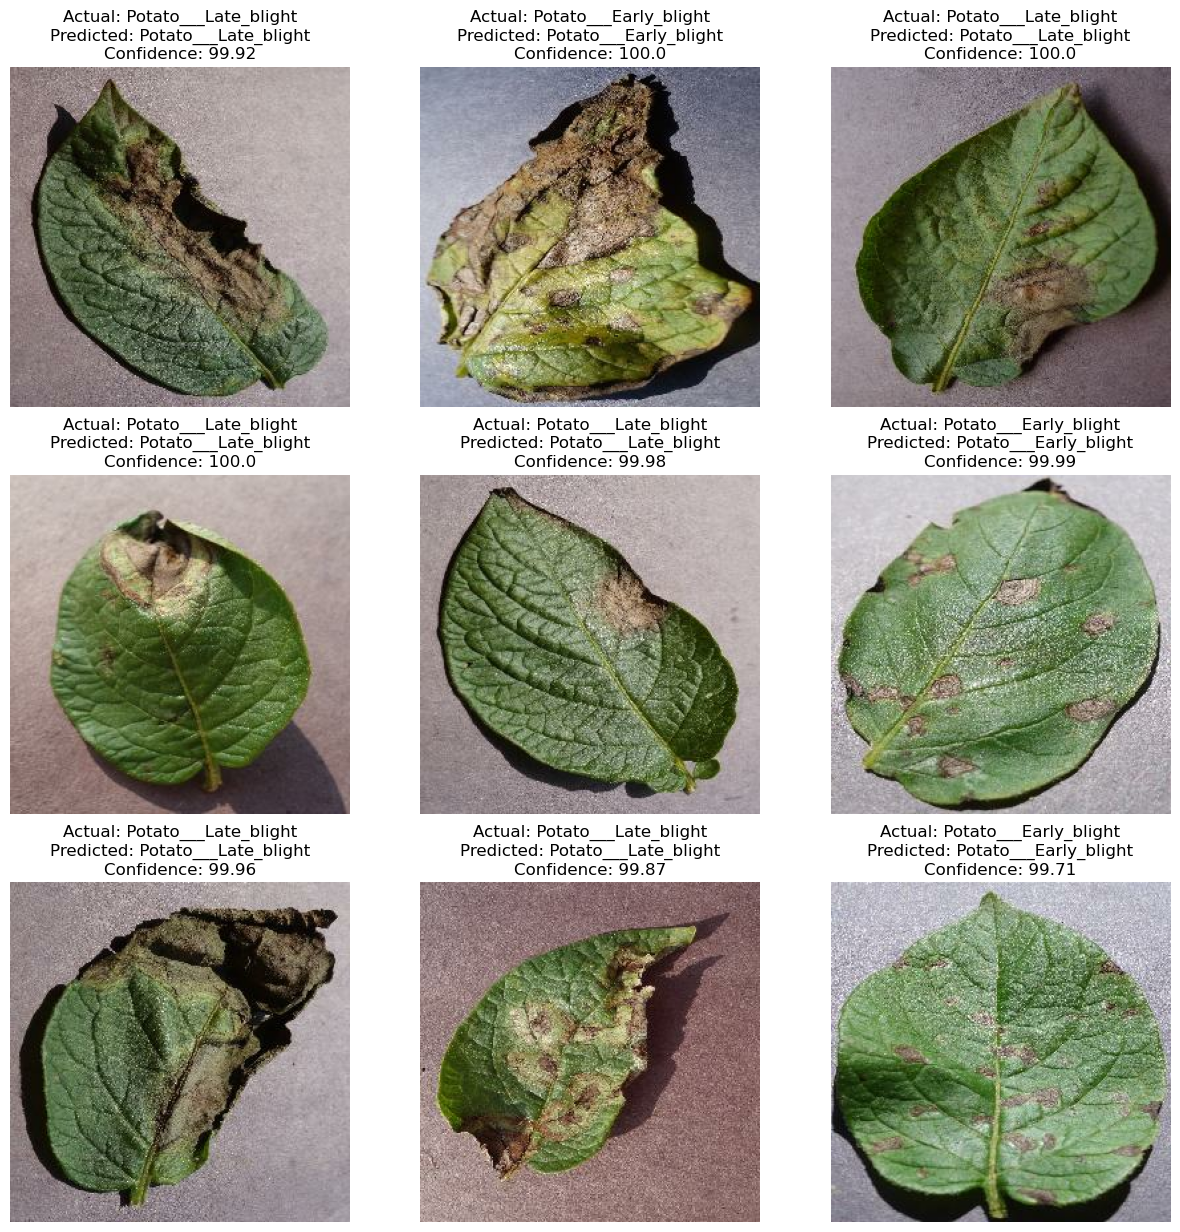

In [9]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
    
        predicted_class,confidence=predict(saved_m,images[i])
        actual_class=class_names[labels[i]]
        plt.title(f'Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}')
        plt.axis('off')

# my work

In [20]:
uploaded=tf.keras.preprocessing.image_dataset_from_directory(
    'uploaded',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),

    )

Found 1 files belonging to 1 classes.


In [21]:
for im,l in uploaded:
    predict(saved_m,im)

ValueError: Unsupported image shape: (1, 256, 256, 3)

TypeError: '_PrefetchDataset' object is not subscriptable